# Training Models

## Daniel Wilcox: 19147414

This example problem can be found within chapter 4 of the "Hands-on Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron. 

This project will be investigating how to train models, specifically regression based models.

## 0) Getting the data.

In [137]:
#General imports for operating system, unzip and URL's
import os
import pickle

#Graphics
import matplotlib
import matplotlib.pyplot as plt

#Array Manipulation
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression



from sklearn.base import clone



# Linear Regression
## The normal Equation

In [5]:
#Generate linear dataset: y = 3x + 4 

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

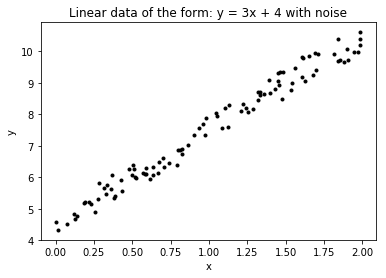

In [27]:
plt.plot(X, y, 'k.', label="Generated linear dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear data of the form: y = 3x + 4 with noise")
plt.show()

In [7]:
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [14]:
print("The calculated theta values are:\n")
print("theta_0 = {}\ntheta_1 = {}\n".format(theta_best[0], theta_best[1]))

The calculated theta values are:

theta_0 = [4.51090149]
theta_1 = [2.99192314]



The original values for theta were [4, 3] however the noise added made it impossible to extract the actual theta values. Predictions can be made from these theta values:

In [23]:
X_new = np.array([[0], [2]]) #x values to predict the value of y at
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [24]:
print("The predicted y values are:\n")
print("y = {} at x = {}\ny = {} at x = {}\n".format(
    y_predict[0], X_new[0], y_predict[1], X_new[1]))

The predicted y values are:

y = [4.51090149] at x = [0]
y = [10.49474776] at x = [2]



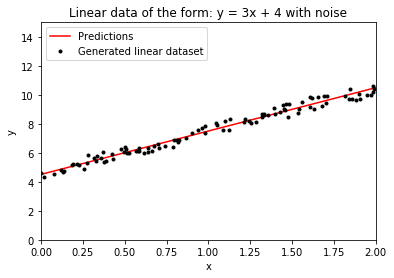

In [26]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, 'k.', label="Generated linear dataset")
plt.axis([0, 2, 0, 15])
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear data of the form: y = 3x + 4 with noise")
plt.show()


Sci-kit Learn has its own version of the code above:

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
intercept = lin_reg.intercept_
coef = lin_reg.coef_
pred = lin_reg.predict(X_new)

In [32]:
print("From sci-kit learn's code:\n")

print("The equations is y = {}x + {}\n".format(coef, intercept))
print("\nPredicitons of the regression line:\n")

print("y = {} at x = {}\ny = {} at x = {}\n".format(
    y_predict[0], X_new[0], y_predict[1], X_new[1]))

From sci-kit learn's code:

The equations is y = [[2.99192314]]x + [4.51090149]


Predicitons of the regression line:

y = [4.51090149] at x = [0]
y = [10.49474776] at x = [2]



# Gradient Descent
## 1. Batch Gradient Descent

In [33]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.rand(2,1)

for iteration in range(n_iter):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*grad
    

In [34]:
print("Theta found with batch gradient descent:\n")
print("theta_0 = {}\ntheta_1 = {}\n".format(theta[0], theta[1]))

Theta found with batch gradient descent:

theta_0 = [4.51090149]
theta_1 = [2.99192314]



## 2. Stochastic Gradient Descent

In [35]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        grad = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * grad

In [36]:
print("Theta found with stochastic gradient descent:\n")
print("theta_0 = {}\ntheta_1 = {}\n".format(theta[0], theta[1]))

Theta found with stochastic gradient descent:

theta_0 = [4.5017688]
theta_1 = [3.00371156]



Again, Sci-kit Learn has its own version of the code above:

In [41]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

intercept = sgd_reg.intercept_
coef = sgd_reg.coef_

In [43]:
print("The equations is y = {}x + {}\n".format(coef, intercept))

The equations is y = [2.99234062]x + [4.5098718]



## 3. Mini-batch Gradient Descent

In [44]:
n_epochs = 50
batch_size = 10

theta = np.random.rand(2,1)

for epoch in range(n_epochs):
    #Shuffle X and y matricies
    shuffle = np.random.permutation(m)
    X_b_mixed = X_b[shuffle]
    y_mixed = y[shuffle]
    
    #range(0, m, minibatch_size): 0 - batch_size in steps of m
    for i in range(0, m, batch_size):
        xi = X_b_mixed[i:i+batch_size]
        yi = y_mixed[i:i+batch_size]
        grads = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * grads

In [45]:
print("Theta found with mini-batch gradient descent:\n")
print("theta_0 = {}\ntheta_1 = {}\n".format(theta[0], theta[1]))

Theta found with mini-batch gradient descent:

theta_0 = [3.79364307]
theta_1 = [3.59517463]



# Polynomial Regression

In [46]:
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

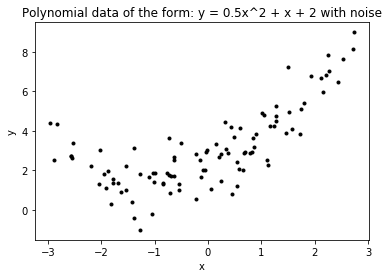

In [47]:
plt.plot(X, y, 'k.', label="Generated polynomial dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial data of the form: y = 0.5x^2 + x + 2 with noise")
plt.show()

In [51]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X = {}\n".format(X[0]))
print("X_poly = {}\n".format(X_poly[0]))


X = [-0.64411891]

X_poly = [-0.64411891  0.41488917]



In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

intercept = lin_reg.intercept_
coef = lin_reg.coef_

print("The equations is y = {:.3f}x^2 + {:.3f}x + {:.3f}\n".format(coef[0][1], coef[0][0], intercept[0]))


The equations is y = 0.483x^2 + 1.050x + 2.114



In [76]:
coef

array([[1.04950345, 0.4828449 ]])

In [77]:
intercept

array([2.11431986])

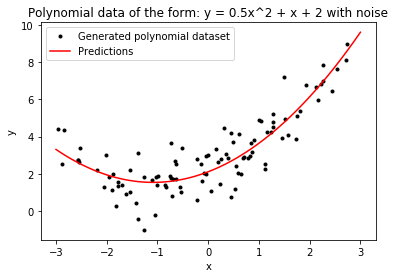

In [78]:
X_poly_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_poly_fit = poly_features.transform(X_poly_new)
y_poly_pre = lin_reg.predict(X_poly_fit)

plt.plot(X, y, 'k.', label="Generated polynomial dataset")
plt.plot(X_poly_new, y_poly_pre, "r-", label="Predictions")
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial data of the form: y = 0.5x^2 + x + 2 with noise")
plt.show()


## Learning Curves


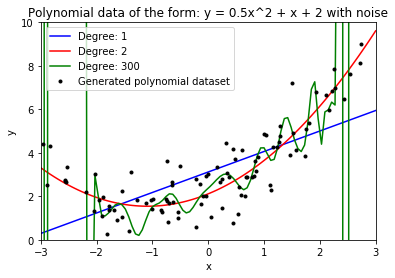

In [114]:
for deg, style in ((1, "b-"), (2, "r-"), (300, "g-")):
    #define functions for pipeline
    poly_feat = PolynomialFeatures(degree=deg, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg_poly = LinearRegression()

    #Define pipeline
    poly_reg = Pipeline([
            ("poly_features", poly_feat),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg_poly),
    ])
    
    poly_reg.fit(X, y)
    y_poly = poly_reg.predict(X_poly_new)
    plt.plot(X_poly_new, y_poly, style, label="Degree: "+str(deg))
    
plt.plot(X, y, 'k.', label="Generated polynomial dataset")
plt.axis([-3, 3, 0, 10])
plt.legend(loc='upper left')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial data of the form: y = 0.5x^2 + x + 2 with noise")
plt.show()

In [108]:
def plot_learning_curves(model, X, y):

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

    train_err, val_err = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
    
        train_err.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_err.append(mean_squared_error(y_val_predict, y_val))
    
    plt.plot(np.sqrt(train_err), "r--", label="train")
    plt.plot(np.sqrt(val_err), "b--", label="val")
    plt.legend(loc='upper right')
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")


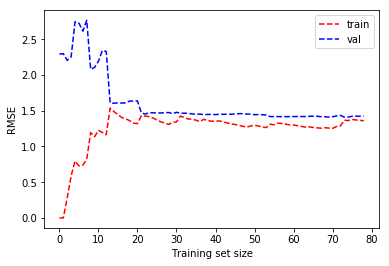

In [109]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

[0, 80, 0, 3]

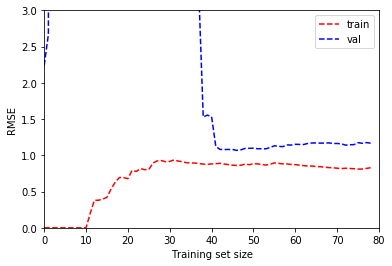

In [116]:
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(poly_reg, X, y)
plt.axis([0, 80, 0, 3])

# Regularized Linear Models
## 1. Ridge Regression

In [127]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.5251826]])

In [128]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3.63082693])

## 2. Lasso Regression
- Least Absolute Shrinkage and Selection Operator Regression (Lasso)

In [129]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.45701923])

## 3. Elastic Net
- mix of Ridge and Lasso

In [126]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.4609032])

## Early Stopping

In [134]:
#Prep Data
poly_scaler = Pipeline([
    ("poly_feat", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                      learning_rate="constant", eta0=0.0005)

minimum_val_err = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_err:
        minimum_val_err = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

# Logistic Regression
## Decision Boundaries

In [135]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [136]:
X = iris["data"][:, 3:] #Petal width
y = (iris["target"] == 2).astype(np.int) #1 if Iris-Virginica, else 0

In [138]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

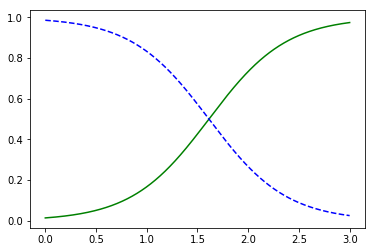

In [140]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

## Soft Max

In [141]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",
                                solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [144]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercises

## 1. 
What Linear Regression training algorithm can you use if you have a training set with millions of features?

- Stochastic Gradient Descent would be the prefered method as it calculates a random singal intance's gradient. This means that only one instance will be stored in memory at each iteration. 
- Mini-Batch Gradient Descent will also work.
- Batch Gradient Descent should only be considered if the training set can fit in memory.
- The Normal Equation is not considered as the computational complexity of the problem is exponetially bigger with each feature added.

# 2. 
Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

- If the features have different scales the cost funtion will take shape of an elongated bowl, which will make gradient decent algorithms slower to convergance.
- The Normal Equation works with/without scaling.
- To fix this problem of features having different scales, the features can be preprocessed to have the same scale (min-max or standardization)


# 3. 
Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

- Gradient descent on a logistic regression model will always find the global minimum (and not get stuck on a local minimum) because the cost function is convex in nature. This means that there is no local minima, just one global minimum.

# 4. 
Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

- If the problem is convex (such as in Logistic regression problems) then all gradient descent algorithms will find the global minimum eventually if the learning rate is low enough. For Stochastic and mini-batch gradient descent, if the learning rate isn't reduced gradually, then the two algorithms will never find the global minimum (GM) as they'll keep "jumping" around the GM.

# 5. 
Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

- If the validation error goes upward every epoch, there are two senarios for the root of this problem
    1. The training error is also going up, which is a sign that the model is diverging. This can be fixed by reducing the learning rate.
    2. The training error is staying the same or going down is a sign that the model is over fitting. Either more training data could be added or the model should be stopped.

# 6. 
Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

- Mini-batch Gradient Descent (as well as stochastic) are random by nature. This means that the model may increase/decrease the validation error each iteration. By stopping the model when the validation error goes up, the model may be stopped prematurely. 
- A different approach is to clone the model when the validation error is at its lowest, and replace the clone if a smaller validation error is found. 


# 7. 
Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

- Between Stochastic, Batch and mini-batch gradient descent, the fastest algorithm is Stochastic as it only considers a single instance at a time. Stochastic reach near the global minimum the fastest but will "jump" around the GM unless the learning rate is gradually decreased (this applies to mini-batch).
- Mini-batch can be considered equivalent to stochastic if the batch size is small.
- Batch gradient descent will converge if given enough time. 

# 8. 
Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

- If the gap between the training error and the validation error is large, this shows that the model is overfitting the training data and not generalized enough. 
- To fix the problem and reduce the gap one can:
    1. As mentioned in question 5, more training data can be added for the model. 
    2. Reduce the polynomial degree (from 300 to 2 in the polynomial problem above)
    3. Regularize the model by adding constraints on the weights (i.e. l1 and l2 penalties to the cost function for Ridge and Lasso respectively.
 

# 9. 
Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

- With both the errors high and almost equal, this would show that the model is predicting poorly for both training data and validation data. When the training error is high, it is a typical trend when models are underfitting. This means there is a high bias. 
- The regularization hyperparameter α should be reduced as it reduces the bias. (increase in α leads to flatter predicitions i.e reduces the varience but increases the bias)

# 10. Why would you want to use: 
1. Ridge Regression instead of Linear Regression?
    - Generally models preform better with some regularization than without. This means that Ridge Regression is prefered instead of Linear Regression.
2. Lasso instead of Ridge Regression?
    - Lasso regression tends to completely eliminate the weights of the least important features (sets them to zero). This means that it automatically performs feature selection and outputs a sparse model (which helps if you assume that only a few features matter). Ridge is good by default otherwise.
3. Elastic Net instead of Lasso?
    - Lasso may behave erratically when number of features is greater than the number of training instances or when several features are strongly correlated.
    
    

# 11. 
Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

- Softmax can classify multiple classes, however, two Logistic Regression classifiers would be recommended. This is because the classes outdoor/indoor and daytime/nighttime are not independent i.e. you could have a photo with any of the four combinations. 

# 12. 
Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).

In [188]:
#petal length (cm)','petal width (cm)
X = iris["data"][:, (2, 3)]

#'setosa', 'versicolor', 'virginica' = [0,1,2]
y = iris["target"]

In [189]:
X[0]

array([1.4, 0.2])

In [190]:
#Add a bias to the 
X_bias = np.c_[np.ones([len(X), 1]), X] 
X_bias[0]

array([1. , 1.4, 0.2])

In [191]:
# Shuffle data (without scikit learn)
#Normally would use train_test_split

#Need training set, validation set and test set
n = len(X_bias) #length of dataset

#Percentage of validation/test size
val_perc = 0.3
test_perc = 0.2

#Number of enteries for each set
size_val = int(n*val_perc)
size_test = int(n*test_perc)
size_train = int(n - size_val - size_test)

#randomly permute a sequence
np.random.seed(42)
index = np.random.permutation(n) 


In [192]:
index

array([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
         9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
       108, 143,  45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,
        32, 142,  85,  86,  16,  10,  81, 133, 137,  75, 109,  96, 105,
        66,   0, 122,  67,  28,  40,  44,  60, 123,  24,  25,  23,  94,
        39,  95, 117,  47,  97, 113,  33, 138, 101,  62,  84, 148,  53,
         5,  93, 111,  49,  35,  80,  77,  34, 114,   7,  43,  70,  98,
       120,  83, 134, 135,  89,   8,  13, 119, 125,   3,  17,  38,  72,
       136,   6, 112, 100,   2,  63,  54, 126,  50, 115,  46, 139,  61,
       147,  79,  59,  91,  41,  58,  90,  48,  88, 107, 124,  21,  57,
       144, 129,  37, 140,   1,  52, 130, 103,  99, 116,  87,  74, 121,
       149,  20,  71, 106,  14,  92, 102])

In [213]:
#training data, using permuted index from 0 -> size_train
X_train = X_bias[index[:size_train]]
y_train = y[index[:size_train]]

#test data, using permuted index from size_train -> size_train+size_test
X_test = X_bias[index[size_train:(size_train+size_test)]]
y_test = y[index[size_train:(size_train+size_test)]]

#validation data, using permuted index from size_train+size_test -> end
X_val = X_bias[index[(size_train+size_test):]]
y_val = y[index[(size_train+size_test):]]


In [214]:
if len(X_test) == size_test:
    print("Successfully shuffled test!\n")
else:
    print("test Shuffle Failed :(\n")

if len(X_train) == size_train:
    print("Successfully shuffled train!\n")
else:
    print("train Shuffle Failed :(\n")
    
if len(X_val) == size_val:
    print("Successfully shuffled val!\n")
else:
    print("val Shuffle Failed :(\n")

Successfully shuffled test!

Successfully shuffled train!

Successfully shuffled val!



In [215]:
#Convert y to one-hot-encoded as currently [0, 1, 2]

#One-hot-encoder
def One_Hot_Encoder(y):
    n_col = y.max()+1 #number of columns
    n_row = len(y) #number of rows
    hot_y = np.zeros((n_row, n_col))
    
    for i in range(n_row):
        hot_y[i][y[i]] = 1
    
    return hot_y

In [216]:
y_train[:5]

array([1, 0, 2, 1, 1])

In [217]:
y_hot_train = One_Hot_Encoder(y_train)
y_hot_test = One_Hot_Encoder(y_test)
y_hot_val = One_Hot_Encoder(y_val)

y_hot_train[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [218]:
#Softmax function
def Softmax(score):
    numerator = np.exp(score)
    denominator = np.sum(score, axis=1, keepdims=True)
    return numerator/denominator

In [234]:
eta = 0.01
iteration = 5000
m = len(X_train)
n_in = X_train.shape[1]
n_out = y_train.max()+1


Theta = np.random.randn(n_in, n_out)

for i in range(iteration):
    score = X_train.dot(Theta)
    y_prob = Softmax(score)
    error = y_prob - y_hot_train
    grad = 1/m * X_train.T.dot(error)
    Theta = Theta - eta*grad

In [235]:
Theta

array([[20.77237162, 15.32513994,        -inf],
       [27.78959478, 64.55984442,        -inf],
       [ 4.38409516, 19.41276802,        -inf]])